## Why Graphs?

Graph Databases provide a way to store highly connected data in a natural way. Unlike other databases, Graph Databses prioritize relationships instead of computing them expensively at query time (with joins etc.). Performance and efficiency with Graph Databases are achieved through the exploitation of locality through relationships versus increasing data velocities. 

Graphs are highly efficient when querying complex and highly connective data because databases can explore only a neighborhood of nodes connected to a subset of starting entities.


Highly successful companies across multiple industries including Google, Facebook, Paypal and Walmart all harness the power of connections in their businesses. Walmart uses Neo4j to drive more personal, relevant recommendations. And in a similar sense, Ebay utilizes Neo4j to speed up their ecommerce delivery routing logistics.




[<img src="https://s3.amazonaws.com/dev.assets.neo4j.com/wp-content/uploads/1-food-agriculture-investments-giin.png">](https://s3.amazonaws.com/dev.assets.neo4j.com/wp-content/uploads/1-food-agriculture-investments-giin.png)


### Tutorial content
Throughout this tutorial, we will outline and emphasize the differences between traditional RDBMS and Graph databases, gain a fundamental understanding of graph concepts, and implement and explore some practical applications of Neo4j and graph data.

We will cover the following topics in this tutorial:
- [Graphs vs. Traditional RDBMS](##Graphs vs. Traditional RDBMS)
- [About Neo4j](##About Neo4j)
- [Setting Up Neo4j](##Setting Up Neo4j)
- [Nodes, Relationships, and Properties](##Nodes, Relationships, and Properties)
- [Cypher Queries](##Cypher Queries)
- [Application: Recommender System](##Application: Recommender System)
- [References and Further Resources](##References and Further Resources)

## Graphs vs. Traditional RDBMS

Graph databases allow users to build models that map more closely to their problem domain increasing flexibility, performance, and convenience.

#### Conveniance
Relational databases are used to store highly structured data. This rigid schema, works well when data is tabular. Unstructured data however, requires a large amount of preprocessing since users must manipulate their data (sometimes in an unnatural way) to fit into a relational databases space.

When working with data that is highly connective, relational databases must match primary keys and foreign keys through joins to produce results. On the other hand graph databases allow the user to directly pattern match on relationships in a query.

#### Performance
Beyond storing and querying data in a more natural way, graph databases also improve performance by several order of magnitude for intensive data relationship handling. As the depth of queries (with relationships) increases, the performance of relational database degrades, while the performance of a graph database remains constant.

#### Flexibility
Expanding a data model to meet changing business needs is also more seamless with graphs because of the ease in which new entities (nodes) and connections can be added. 

## About Neo4j

Throughout this tutorial we will be using the most popular graph databse platform, Neo4j. Neo4j is a free, open source graph database.

## Setting Up Neo4j

Download Neo4j Community Edition from this link: https://neo4j.com/download/other-releases/#releases

-Once you have Neo4j downloaded onto your Desktop, launch the application.

-Once the application is launched, a pop-up window will appear. 

-Clik the options button and edit the configuration file. 

-In the configuration file, disable the requirement of authorization access to Neo4j:

         "dbms.security.auth_enabled=false"



#### PY2NEO

py2neo is one of Neo4j's python drivers. Install it by running the following command in your terminal window. 

pip install py2neo


## Nodes, Relationships, and Properties

#### Nodes

According to the property graph model, Nodes represent entities. Nodes may have __attributes__ which correspond to key-value pairs in a traditional database. Nodes that are of the same type may share the same __label__. 

In [97]:
from py2neo import Graph, Node, Relationship, PropertyDict


In [40]:

graph = Graph()

#Lets insert ten Nodes into our graph that represent tv. shows
#Label: Show, Attributes: numSeasons, genre

BigLittleLies=Node("Show", name="Big Little Lies", numSeasons=2, genre="Drama")
Bachelor=Node("Show", name="Bachelor", numSeasons=22, genre="Reality")
Sherlock=Node("Show", name="Sherlock", numSeasons=4, genre="Crime Drama")
BlackMirror=Node("Show", name="Black Mirror", numSeasons=4, genre="Science Fiction")
ThisIsUs=Node("Show", name="This Is Us", numSeasons=2, genre="Drama")
GossipGirl=Node("Show", name="Gossip Girl", numSeasons=6, genre="Drama")
TheOffice=Node("Show", name="The Office", numSeasons=9, genre="Comedy")
Parks=Node("Show", name="Parks and Recreation", numSeasons=7, genre="Comedy")
GameOfThrones=Node("Show", name="Game of Thrones", numSeasons=7, genre="Fantasy Drama")
Crown=Node("Show", name="The Crown", numSeasons=2, genre="Historical Drama")

graph.create(BigLittleLies | Bachelor | Sherlock | BlackMirror | ThisIsUs |GossipGirl | TheOffice |Parks |GameOfThrones | Crown)


In [41]:
#lets insert Nodes into our graph that represent Producers. 
#Label: Producer 

Kidman = Node("Producer", name="Nicole Kidman")#Big Little Lies
Valee = Node("Producer", name="Jean-Marc Valee")#Big Little Lies
Witherspoon = Node("Producer", name="Reese Witherspoon")#Big Little Lies
Fleiss = Node("Producer", name="Mike Fleiss") #bachelor
Gatiss = Node("Producer", name="Mark Gatiss") #Sherlock
Brooker = Node("Producer", name="Charlie Brooker") #Black Mirror
Fogelman= Node("Producer", name="Dan Fogelman") #This is Us
Schwartz = Node("Producer", name="Josh Schwartz") #Gossip Girl
Benioff = Node("Producer", name="David Benioff") #GOT
Daniels = Node("Producer", name="Greg Daniels") #Parks, Office
Morgan = Node("Producer", name="Peter Morgan") #Crown

graph.create(Kidman | Valee | Witherspoon | BlackMirror | Fleiss |Gatiss | 
                 Brooker |Fogelman |Schwartz | Benioff | Daniels | Morgan)

In [42]:
#Insert nodes into our graph that reprsent Actors
#Label: Actor Attributes: Age

Kidman = Node("Actor", name="Nicole Kidman", age=50)#Big Little Lies
Lively = Node("Actor", name="Blake Lively", age=30)#Gossip Girl
Witherspoon = Node("Actor", name="Reese Witherspoon", age=42)#Big Little Lies
Cumberbatch = Node("Actor", name="Benedict Cumberbatch", age=41) #Sherlock
Metz= Node("Actor", name="Chrissy Metz", age=37) #This is Us
Brown= Node("Actor", name="Sterling K. Brown",age=41) #This is Us
Harington = Node("Actor", name="Kit Harington") #GOT
Turner = Node("Actor", name="Sophie Turner") #GOT
Foy = Node("Actor", name="Claire Foy") #Parks, Office

graph.create(Kidman | Lively | Witherspoon | Cumberbatch | Metz | Brown | 
                 Harington |Turner |Foy)

In [43]:
#Insert 10 nodes into our graph that reprsent Characters
#Label: Character 

Woodsen = Node("Character", name="Serena Van der Woodsen")
Wright = Node("Character", name="Celese Wright")
Holmes = Node("Character", name="Sherlock Holmes") 
Pearson = Node("Character", name="Kate Pearson") 
Pearson2 = Node("Character", name="Randall Perason") 
Snow= Node("Character", name="Jon Snow") 
Stark = Node("Character", name="Sansa Stark") 
Mackenzie = Node("Character", name="Madeline Mackenzie") 
Elizabeth = Node("Character", name="Queen Elizabeth") 


graph.create( Woodsen | Wright | Holmes | Pearson | Pearson2| 
                Snow | Stark |Elizabeth | Mackenzie)

Below we can see the all the nodes we inserted into our database:
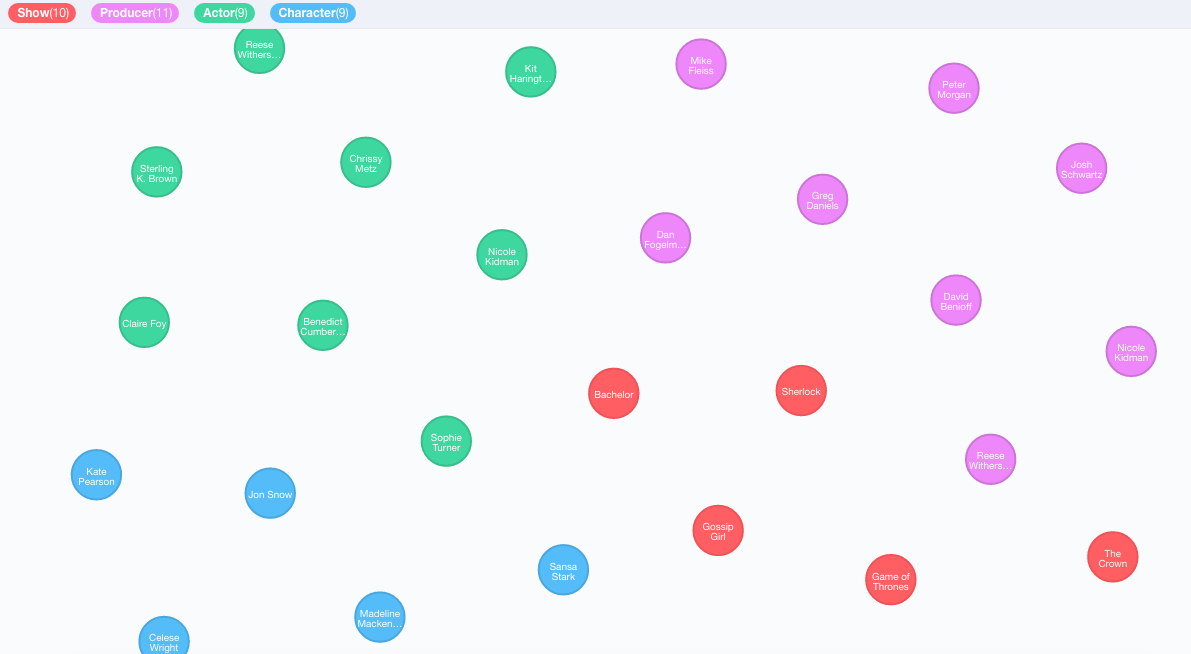

#### Relationships

In a property graph model, a __relationship__ reprsents a connection between two nodes within the graph. Relationships are directed and correspond to the "edges" of the graph. All connections have a type in a similar way that a node has a label. Labels and Types help reduce the subset of nodes that are traversed in a query thereby increasing the efficiency of producing results. Relationships can have __properties__ that give more insight/information into the type of relationship that exists between nodes.

In [44]:
a=Relationship(Kidman, "Produced", BigLittleLies)
b=Relationship(Valee, "Produced", BigLittleLies)
c=Relationship(Witherspoon, "Produced", BigLittleLies)
d=Relationship(Valee, "Produced", BigLittleLies)
e=Relationship(Fleiss, "Produced", Bachelor)
f=Relationship(Gatiss, "Produced", Sherlock)
g=Relationship(Fogelman, "Produced", ThisIsUs)

h=Relationship(Kidman, "ActedIn", BigLittleLies)
i=Relationship(Witherspoon, "ActedIn", BigLittleLies)
j=Relationship(Cumberbatch, "ActedIn", Sherlock)
k=Relationship(Metz, "ActedIn", ThisIsUs)
l=Relationship(Brown, "ActedIn", ThisIsUs)

m=Relationship(Kidman, "Played", Wright)
n=Relationship(Witherspoon, "Played", Mackenzie)
o=Relationship(Cumberbatch, "Played", Holmes)
p=Relationship(Metz, "Played", Pearson)
q=Relationship(Brown, "Played", Pearson2)

r=Relationship(Wright, "CharacterIn", BigLittleLies)
s=Relationship(Mackenzie, "CharacterIn", BigLittleLies)
t=Relationship(Holmes, "CharacterIn", Sherlock)
u=Relationship(Pearson, "CharacterIn", ThisIsUs)
v=Relationship(Pearson2, "CharacterIn", ThisIsUs)

graph.create(a | b |c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v)



Below we can see a subset of our graph with the newly inserted relationships.
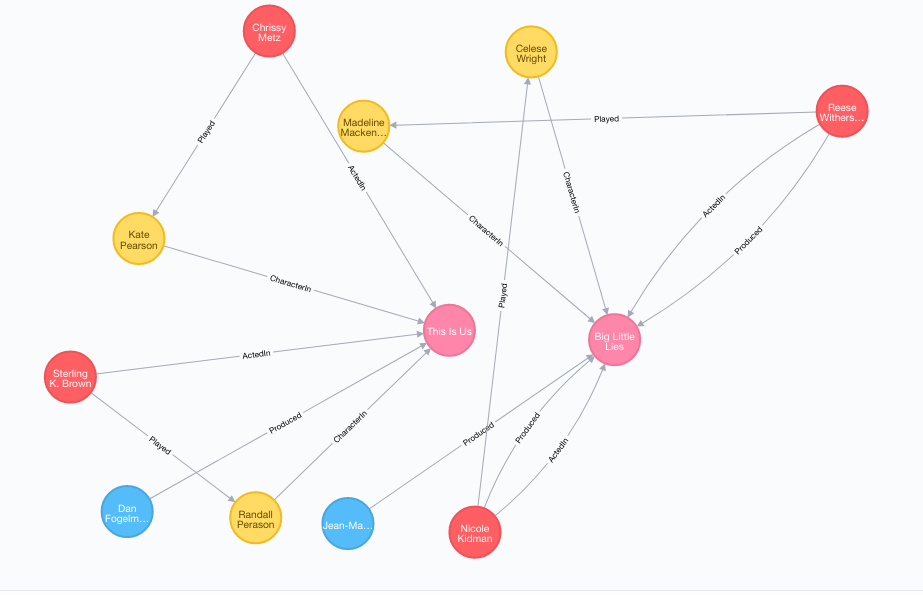

Now that we have inserted nodes and relationships into our database, we have a highly connected data domain to play around with and perform some interesting queries on. 

### Some Basic py2neo Commands

Before We move into some interesting queries, lets become familiar with some useful and common py2neo commands.

graph.delete_all()    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        [delete all nodes in your graph]

node[key]           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        [Return the property value of node with key]

node[key] = value   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         [Set the property value of node with key]

del node[key]    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            [Remove the property with key key from node]

labels()       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;               [Return the full set of labels associated with the node]

add_label(label)  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            [Add the label label to the node]

relationship == other  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       [check equality for relationship]

del relationship[key]   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      [Remove the property with key key from relationship]



In [38]:
print(Witherspoon["age"])
print(GameOfThrones["genre"])
print(TheOffice["numSeasons"])

42
Fantasy Drama
9


In [57]:
print(Valee.labels())
print(ThisIsUs.labels())
print(Witherspoon.labels())
print(Kidman.labels())

SetView({'Producer'})
SetView({'Show'})
SetView({'Producer', 'Actor'})
SetView({'Producer', 'Actor'})


In [59]:
Witherspoon.add_label("Producer")
Kidman.add_label("Producer")
print(Witherspoon.labels())
print(Kidman.labels())

SetView({'Producer', 'Actor'})
SetView({'Producer', 'Actor'})


## Cypher Queries

Cypher is the querying language used with Neo4j. Cypher is very similar to SQL, however it is a declarative language that uses acii-art syntax to describe patterns. Because it is more of a visual language, Cypher is fairly straightforward to pick up, especially for those who are familiar with SQL. We will now go through some interesting queries on the data we imported into our graph database.




### Example Queries
Return all actors in our data set that are >30 years of age.

In order to complete this query we need to create a query string in Cypher and use 
the command graph.data to execute the query.

Cypher matches on nodes and relationships. A user can specify a specific label or property to match on by including the label after ":" . In the query below we assign an arbitrary variable p to the nodes that we are searching for. We limit our search of these nodes by specifying that they are "Actor" nodes. We then limit the query search further by specifying that we only want the nodes that have an age property field whose value is greater than 30. 

In [61]:
query = """
MATCH (p:Actor)
WHERE p.age > 30
RETURN p.name 
"""

data = graph.data(query)
print(data)

[{'p.name': 'Chrissy Metz'}, {'p.name': 'Reese Witherspoon'}, {'p.name': 'Nicole Kidman'}, {'p.name': 'Benedict Cumberbatch'}, {'p.name': 'Sterling K. Brown'}]


Return the longest running tv show. We do this by matching on the label "Show" and 

In [76]:
query="""
MATCH (p:Show)
RETURN p.name ORDER BY p.numSeasons DESC LIMIT 1
"""

data = graph.data(query)
print(data)

[{'p.name': 'Bachelor'}]


Return all shows that have lasted for more than 5 seasons, 

In [77]:
query = """
MATCH (p:Show)
WHERE p.numSeasons>5
RETURN p.name, p.numSeasons ORDER BY p.numSeasons DESC 
"""

data = graph.data(query)
print(data)

[{'p.name': 'Bachelor', 'p.numSeasons': 22}, {'p.name': 'The Office', 'p.numSeasons': 9}, {'p.name': 'Parks and Recreation', 'p.numSeasons': 7}, {'p.name': 'Game of Thrones', 'p.numSeasons': 7}, {'p.name': 'Gossip Girl', 'p.numSeasons': 6}]


Return the producers of the longest running tv show

We can also use Cypher to match on relationships. When matching on relationships, 


In [86]:
query = """
MATCH (a:Producer)-[:Produced]-(b:Show)
RETURN a.name, b.name ORDER BY b.numSeasons DESC LIMIT 1

"""

data = graph.data(query)
print(data)

[{'a.name': 'Mike Fleiss', 'b.name': 'Bachelor'}]


Add IMBD tv show ratings to all shows

#### Subgraphs
A Subgraph is a collection of nodes and relationships

In order to accomplish this task, we need to create new subgraphs for the nodes we want to update and merge them with the existing nodes in our database. This is to ensure that no information is lost.

Therefore we must:

1.) Create a new node for the show we want to include the rating of

2.) Insert the Rating into the node as a property

3.) Merge the subgraph with a singular node with the current existing graph

4.) Push changes



In [104]:
BigLittleLies=Node("Show")
BigLittleLies["rating"]= 8.6
graph.merge(BigLittleLies)
graph.push(BigLittleLies)

Bachelor=Node("Show")
Bachelor["rating"]=3.1
graph.merge(Bachelor)
graph.push(Bachelor)

Sherlock=Node("Show")
Sherlock["rating"]=9.2
graph.merge(Sherlock)
graph.push(Sherlock)


BlackMirror=Node("Show")
BlackMirror["rating"]=8.9
graph.merge(BlackMirror)
graph.push(BlackMirror)

ThisIsUs=Node("Show")
ThisIsUs["rating"]= 8.8
graph.merge(ThisIsUs)
graph.push(ThisIsUs)

GossipGirl=Node("Show")
GossipGirl["rating"]=7.4
graph.merge(GossipGirl)
graph.push(GossipGirl)

TheOffice=Node("Show")
TheOffice["rating"]=8.8
graph.merge(TheOffice)
graph.push(TheOffice)

Parks=Node("Show")
Parks["rating"]=8.6
graph.merge(Parks)
graph.push(Parks)

GameOfThrones=Node("Show")
GameOfThrones["rating"]=9.5
graph.merge(GameOfThrones)
graph.push(GameOfThrones)

Crown=Node("Show")
Crown["rating"]= 8.7
graph.merge(Crown)
graph.push(Crown)

Return all the actors that played characters in a drama series that have an IMBD rating greater than an 8.0.

In [118]:
query = """
MATCH (a:Actor)-[:Played]-(c:Character)-[:CharacterIn]-(b:Show)
WHERE b.rating>=8.0 AND b.genre CONTAINS "Drama"  
RETURN a.name

"""

data = graph.data(query)
print(data)

[{'a.name': 'Reese Witherspoon'}, {'a.name': 'Nicole Kidman'}, {'a.name': 'Chrissy Metz'}, {'a.name': 'Sterling K. Brown'}, {'a.name': 'Benedict Cumberbatch'}]


After performing the above queries, its powerful and effective to consider how these queries would be exectued in a graph database vs. a traditional RDBMS database. In a RDBMS setting, for the above query, 3 expensive joins would be required to produce the results of the query. On the other hand, with Neo4j, the database is able to search Nodes of type Show, Actor, and Character and pattern match on relationships originating from these nodes. 


## Application: Recommender System

A recommendation engine is a system that attempts to predict the "rating" a customer or user would give to a good or service. These predictive ratings are used to recommend targeted options to consumers. 

In the last section of this tutorial, we will be implementing a simple recommender system that recommends movies to people based on their previous/current preferences.

The following snippet code is from the official Neo4j website. It loads a small movie csv data set and structures the data into our graph database. This movie database will include 2 Nodes: Movies and Actors with the relationship "ACTED_IN" connecting the two.

__Properties Table__

Movie: Title, Release Date, Tagline

Actor: Name, DOB

ACTED_IN: Role

In [122]:
query = """
LOAD CSV WITH HEADERS FROM "https://neo4j-contrib.github.io/developer-resources/cypher/movies_actors.csv" AS line
WITH line
WHERE line.job = "ACTED_IN"
MERGE (m:Movie {title:line.title}) ON CREATE SET m.released = toInt(line.released), m.tagline = line.tagline
MERGE (p:Person {name:line.name}) ON CREATE SET p.born = toInt(line.born)
MERGE (p)-[:ACTED_IN {roles:split(line.roles,";")}]->(m)
RETURN count(*);

"""

data = graph.data(query)
print(data)




[{'count(*)': 172}]


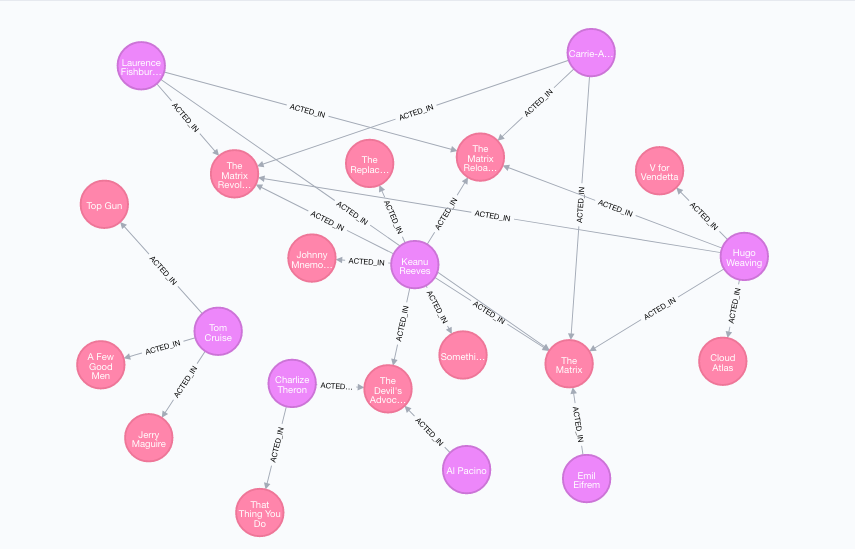

#### Preferences

Now that we have a data set to work with, lets begin making some recommendations!

Let us assume that our Customer is Joe.

Here are a few of Joe's movie preferences:

-Joe prefers newer movies (released in the 1990's)

-Joe's favorite Movie is The A Few Good Men and his favorite Actor is Bonnie Hunt.



####  Recommendation

Lets make a recommendation of top 5 movies for Joe to watch next.
The movies must have been released in the 1990's. Let's also recommend other movies Bonnie Hunt's costars have starred in. Let's also recommend movies that the stars of A Few Good Men haved acted in.

The first query, finds Bonnie Hunt's Node, pattern matches on the movies shes acted in, finds her costars for all of her movies, and then returns a list of all of the movies these costars have acted in.

The second query, finds the Node corresponding to A Few Good Men. It then finds all of the other movies, the stars of
A Few Good Men have acted in.

In [137]:

query = """
MATCH (a:Person {name:"Bonnie Hunt"})-[:ACTED_IN]->(b:Movie)<-[:ACTED_IN]-(c:Person)-[:ACTED_IN]->(d:Movie)
WHERE  d.released>=1900 and d.released<2000
RETURN d.title

"""

query2= """
MATCH (d:Movie)<-[:ACTED_IN]-(a:Person)-[:ACTED_IN]->(b:Movie {title:"A Few Good Men"})
WHERE d.released>=1900 AND d.released<2000
RETURN d.title

"""


data = graph.data(query)
data2 = graph.data(query2)

#### Post Processing

Before making our final recommendation, let's remove duplicates and limit the number of recommendations to 5.

In [138]:
new_data=data+data2

final=[]
count=0
i=0
while (count <5):
    if new_data[i] not in final:
        final.append(new_data[i])
        count+=1
    i+=1
    
print(final)

[{'d.title': 'That Thing You Do'}, {'d.title': 'Top Gun'}, {'d.title': 'A Few Good Men'}, {'d.title': 'As Good as It Gets'}, {'d.title': 'Apollo 13'}]


And there you have it! We just implemented our own recommender system using a graph database. 

## Further Resources

http://py2neo.org/v4/index.html   [Py2Neo Documentation (How to use Neo4j in a Python Environment)]

https://neo4j.com/                 [Neo4j official website (Why Graphs, Ways to use Neo4j)]

https://neo4j.com/graph-databases-book/  [A great book on graph databases]

https://neo4j.com/docs/cypher-refcard/current/   [Cypher Reference Card]